<a href="https://colab.research.google.com/github/nhatthangle/Text-classification/blob/main/Simulations_for_Swarm_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
import time
from math import cos, exp, pi, sin

import matplotlib.pyplot as plt
from scipy.integrate import quad

import pandas as pd
import random; random.seed(2)

from sympy.solvers import solve
from sympy import Symbol
from scipy.optimize import brentq


# I. Inhomogeneous continuous time Markov chains

## I.0. Define functions

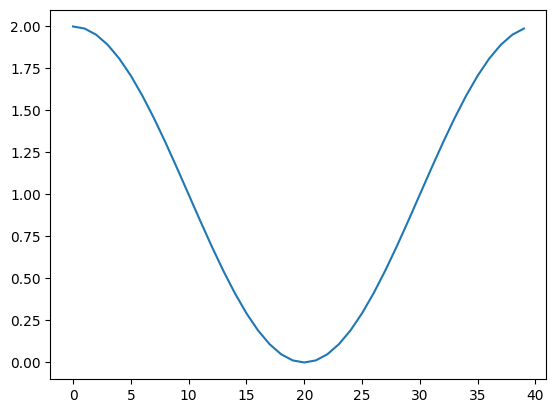

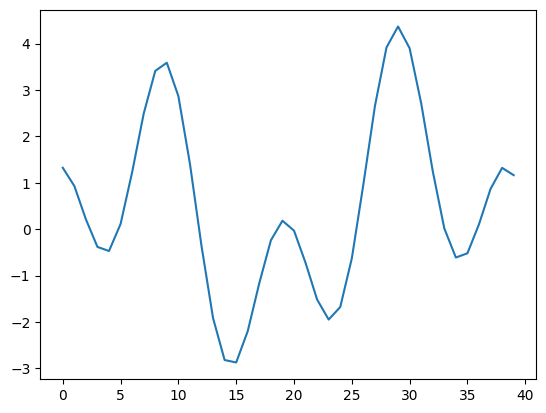

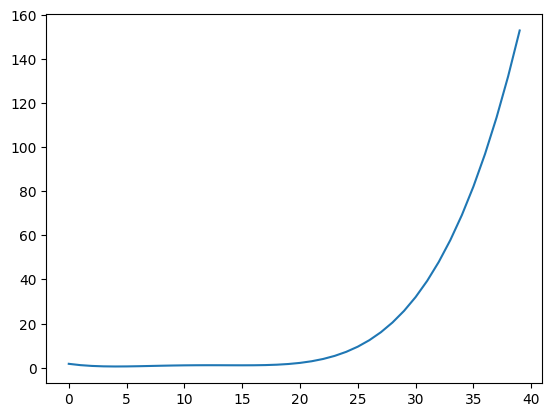

(None, None, None)

In [ ]:
## FUNCTION U FOR MINIMIZING
S  = 40  # NUMBER OF STATES (SET S)
U1 = []
U2 = []
U3 = []

for i in range(S):
  U1.append(1+cos(2*pi/S*i))
  #U2.append( (i/2-15)**2 + 30*cos(1*i -10 ) +20*sin(1*i-10))
  #U2.append( (i-8)**2/7 + 10*cos(3*i -2 ) +8*sin(1*i-2))
  U2.append( (-0.6+i/11)**2 /10  + 2* (cos(3* (-0.6 +i/11) ) + sin( 7*(-0.6+i/11)) ) )
  U3.append( (-1.3+i/8)**4- (-1.3+i/8)**2 + (-1.3+i/7)/3 +1 )

U1 = np.asarray(U1) ## Turn it into an numpy array
U2 = np.asarray(U2)
U3 = np.asarray(U3)

ppi = np.full(S,1/S)

def drawU(U):
  xs = [x for x in range(len(U))]
  plt.plot(xs, U)
  plt.show()

drawU(U1), drawU(U2), drawU(U3)

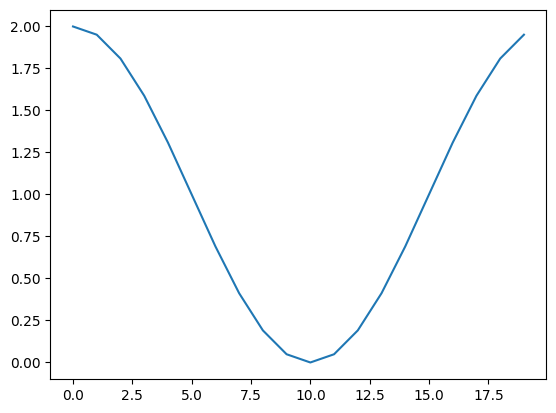

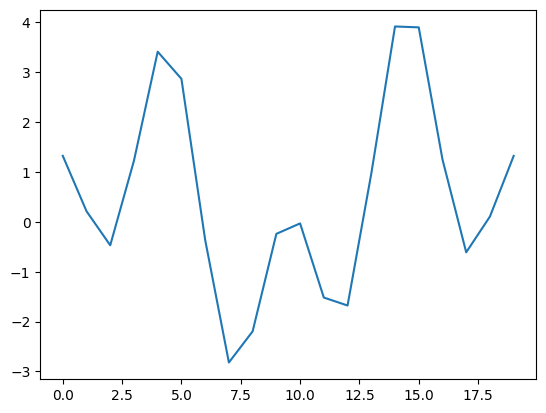

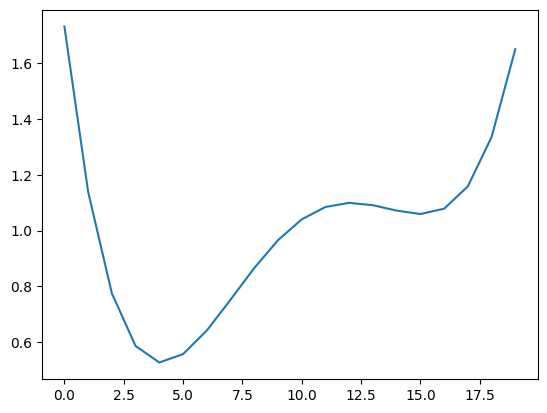

(None, None, None)

In [ ]:
## FUNCTION U FOR MINIMIZING
S  = 20  # NUMBER OF STATES (SET S)
U1 = []
U2 = []
U3 = []

for i in range(S):
  U1.append(1+cos(2*pi/S*i))
  #U2.append( (i/2-15)**2 + 30*cos(1*i -10 ) +20*sin(1*i-10))
  #U2.append( (i-8)**2/7 + 10*cos(3*i -2 ) +8*sin(1*i-2))
  U2.append( (-0.6+i/5.5)**2 /10  + 2* (cos(3* (-0.6 +i/5.5) ) + sin( 7*(-0.6+i/5.5)) ) )
  U3.append( (-1.3+i/8)**4- (-1.3+i/8)**2 + (-1.3+i/7)/3 +1 )

U1 = np.asarray(U1) ## Turn it into an numpy array
U2 = np.asarray(U2)
U3 = np.asarray(U3)

ppi = np.full(S,1/S)

def drawU(U):
  xs = [x for x in range(len(U))]
  plt.plot(xs, U)
  plt.show()

drawU(U1), drawU(U2), drawU(U3)


In [ ]:
%%script false --no-raise-error

## FUNCTION U FOR MINIMIZING
S = 60  # NUMBER OF STATES (SET S)
U1 = []
U2 = []
U3 = []

for i in range(S):
  U1.append(1+cos(2*pi/S*i))
  #U2.append( (i/2-15)**2 + 30*cos(1*i -10 ) +20*sin(1*i-10))
  U2.append( (i/2-15)**2 + 30*cos(3/4*i -15 ) +18*sin(1/2*i-10))
  U3.append( (-2+i/15)**4-2* (-2+i/15-0.07)**2 +1 )

U1 = np.asarray(U1) ## Turn it into an numpy array
U2 = np.asarray(U2)
U3 = np.asarray(U3)

ppi = np.full(S,1/S)

def drawU(U):
  xs = [x for x in range(len(U))]
  plt.plot(xs, U)
  plt.show()

drawU(U1), drawU(U2), drawU(U3)

In [ ]:
U2, np.argmin(U2)

(array([ 1.32474736,  0.21413278, -0.46949513,  1.22836368,  3.41288447,
         2.86830419, -0.3611184 , -2.81995257, -2.195789  , -0.24023109,
        -0.03065433, -1.5174799 , -1.67771641,  0.96636521,  3.91877538,
         3.90107428,  1.25235257, -0.61057941,  0.10741333,  1.32244937]),
 7)

In [ ]:
### FUNCTIONS AND INTEGRAL

# NEGATIVE PART

def negative_part(x):
  if x >0:
    return 0
  else:
    return -x

# FUNCTION PHI (defaut m_1=-1 m_2=2)

def phi(x, m_1 = -1, m_2 = 2):
  if x >=1: return (x**m_2-1-m_2*(x-1))/(m_2*(m_2-1))
  if x >0: return (x**m_1-1-m_1*(x-1))/(m_1*(m_1-1))
  return 'Error!'

## 1ST- DERIVATIVE (defaut m_1=-1 m_2=2)

def dx_dphi(x, m_1= -1, m_2 = 2):
  if x >=1: return (x**(m_2-1)-1)/(m_2-1)
  if x >0: return (x**(m_1-1)-1)/(m_1-1)
  return "Error!"

## INVERSE OF THE FIRST DERIVATIVE

def dphi_inverse(t, m_1=-1, m_2 =2):
  if t < 0: return (t*(m_1-1))**(1/(m_1-1))
  return (t*(m_2-1))**(1/(m_2-1))


## 2ND - DERIVATIVE (defaut m_1=-1 m_2=2)

def d2x_d2phi(x, m_1= -1, m_2 = 2):
  if x >=1: return x**(m_2-2)
  if x >0: return x**(m_1-2)
  return "Error!"

### THETA FUNCTION (IN MAAS') (defaut m_1=-1 m_2=2)

def theta(s,t,m_1=-1, m_2 = 2):
  if s == 0 or t==0:
    return 0
  elif  s==t:
    return d2x_d2phi(s, m_1, m_2)
  else:
    return (s-t)/(dx_dphi(s,m_1=-1, m_2 = 2)-dx_dphi(t,m_1=-1, m_2 = 2))

### PLOTING A FUNCTION ON [0, \INFTY)

def draw(f,m_1=-1,m_2=2):
  y = np.linspace(0.00001, 2, 1000000)
  list_phi =[]
  for i in range(len(y)):
    list_phi.append(f(y[i],m_1,m_2))
  list_phi = np.asarray(list_phi, dtype=np.float32)
  plt.plot(y, np.log(list_phi), color='red')
  plt.show()

### INTEGRAL FROM 0 TO t:

def integral(f,t,a=0):
  return quad(f, a, t)[0]

### TOTAL VARIANCE DISTANCE

def total_dist(a,b):
  a = np.asarray(a)
  b = np.asarray(b)
  return np.sum(np.abs(a-b))

def l2_dist(a,b):
  a = np.asarray(a)
  b = np.asarray(b)
  return np.sum((a-b)**2)/S


In [ ]:
quad(phi,4,3), dphi_inverse(1), dphi_inverse(0), dphi_inverse(-1)

((-3.166666666666667, 3.515706244646329e-14), 1.0, 0.0, 0.7071067811865476)

In [ ]:
def give_inv(b, U):
  def func_for_C(c):
    sum = 0
    for i in range(S):
      sum = sum + dphi_inverse(c - b*U[i])
    return sum/S -1
  root = brentq(func_for_C,-2**30,2**30)  ## THE RANGE HERE DEPENDS ON THE SIGN OF MIN U
  density_nu = [dphi_inverse(root - b*U[i]) for i in range(S)]
  density_nu = np.asarray(density_nu)
  return density_nu

In [ ]:
### Transform a measure to a density with respect to pi

def density_transform(mu):
  z = np.zeros(S)
  for i in range(len(mu)):
    z[i] = mu[i]/ppi[i]
  return z

### Couting measure in the notes

def counting_measure(x):
  C = np.zeros(S)
  for i in range(S):
    C[i] = np.count_nonzero(x == i)
  return C/len(x)

In [ ]:
counting_measure(np.array([1,2,3,4,6,4,2,2,4,6,7,12,12,5,4,3,19,10,17,17]))

array([0.  , 0.05, 0.15, 0.1 , 0.2 , 0.05, 0.1 , 0.05, 0.  , 0.  , 0.05,
       0.  , 0.1 , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.  , 0.05])

## I.1. Nonlinear case

In this section, we simulate a nonlinear Markov chain for minizing a function $U$.

### Create simulations commands

In [ ]:
### HISTOGRAM EVOLUTION OF PARTICLES
def color_gradient(x=0.0, start=(0, 0, 0), stop=(1, 1, 1)):
    r = np.interp(x, [0, 1], [start[0], stop[0]])
    g = np.interp(x, [0, 1], [start[1], stop[1]])
    b = np.interp(x, [0, 1], [start[2], stop[2]])
    return (r, g, b)
def show_evol(Z, step, end, start = 0):
  df = pd.DataFrame()
  for i in range(start, end, step):   # DATA FRAME CCONTAINING THE POSITIONS OF PARTICLES AT TIME 200, 400,...,2000
    df[i] = np.copy(Z[i])
  joypy.joyplot(df, overlap=1,
              colormap=lambda x: color_gradient(x, start=(.78, .25, .09), stop=(1.0, .64, .44)),
              linecolor='w', linewidth=1 )
def plot_simu(Z):
  plt.hist(Z[0][-1], bins = np.arange(S))
  plt.show()

def dist_fixed(Z, U, beta):
  distance1 = [total_dist(counting_measure(Z[0][i]), give_inv(beta,U)/S) for i in range(len(Z[0]))]
  distance2 = [l2_dist(counting_measure(Z[0][i])   , give_inv(beta,U)/S) for i in range(len(Z[0]))]
  return distance1, distance2

def draw_histograms(Z, l, n_rows = 4, n_cols =4):
    points = [i* int (np.floor( len(Z[0])/l ) ) for i in range(l)]
    df = [Z[0][i] for i in points]
    fig=plt.figure(figsize=(12,12))
    for i in range(l):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        plt.hist(df[i],bins=range(S+1))
        #df[i].hist(bins=range(S),ax=ax)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def fdraw_histograms(Z, l, n_rows = 4, n_cols =4):
    points = [i* int (np.floor( len(Z[0])/l ) ) for i in range(l-1)]
    df = [Z[0][i] for i in points]
    df.append(Z[0][-1])
    fig=plt.figure(figsize=(12,12))
    for i in range(l):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        plt.hist(df[i],bins=range(S+1))
        #df[i].hist(bins=range(S),ax=ax)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

In [ ]:
#%%script false --no-raise-error

### OLD GENERATOR

def gen_L1(eta,X, L =2, beta = 1000, U = U1):      # ETA IS A MEASURE!
    rho = density_transform(eta)
    expression_iplus1  = theta(rho[X],rho[(X+1)%S])/rho[X]*beta*(U[(X+1)%S] - U[X]) + rho[(X+1)%S]/rho[X]-1
    expression_iminus1 = theta(rho[X],rho[(X-1)%S])/rho[X]*beta*(U[(X-1)%S] - U[X]) + rho[(X-1)%S]/rho[X]-1
    L_diag = L*(negative_part(expression_iplus1)+ negative_part(expression_iminus1))
    return L_diag

def jump_dist1(eta,X, beta = 1000, U = U1):
    rho = density_transform(eta)
    expression_iplus1  = theta(rho[X],rho[(X+1)%S])/rho[X]*beta*(U[(X+1)%S] - U[X]) + rho[(X+1)%S]/rho[X]-1
    expression_iminus1 = theta(rho[X],rho[(X-1)%S])/rho[X]*beta*(U[(X-1)%S] - U[X]) + rho[(X-1)%S]/rho[X]-1
    a = negative_part(expression_iplus1) / (negative_part(expression_iplus1) + negative_part(expression_iminus1))
    return np.array([a,1-a])

In [ ]:
### Generator as a function of the law:

def gen_L2(eta,X, L =2, beta = 1000, U = U1):      # ETA IS A MEASURE!
    rho = density_transform(eta)
    expression_iplus1  = theta(rho[X],rho[(X+1)%S])/rho[X] * beta * negative_part(U[(X+1)%S] - U[X]) + 1
    expression_iminus1 = theta(rho[X],rho[(X-1)%S])/rho[X] * beta * negative_part(U[(X-1)%S] - U[X]) + 1
    L_diag = L*(expression_iplus1 + expression_iminus1)
    return L_diag

def jump_dist2(eta,X, beta = 1000, U = U1):
    rho = density_transform(eta)
    expression_iplus1  = theta(rho[X],rho[(X+1)%S])/rho[X] * beta * negative_part(U[(X+1)%S] - U[X]) + 1
    expression_iminus1 = theta(rho[X],rho[(X-1)%S])/rho[X] * beta * negative_part(U[(X-1)%S] - U[X]) + 1
    a = expression_iplus1 / (expression_iplus1 + expression_iminus1)
    return np.array([a,1-a])



In [ ]:
def simulate_inhomo1( num_particles = 100, initial= ppi,  step= 500000, beta = 1000, U = U1, L = 0.5, timeout = 60*2):
  M = num_particles        # NUMBER OF PARTICLES NEEDED
  list_of_particles = []   # A LIST OF POSITIONS FOR KEEPING TRACK OF THE EVOLUTION
  list_of_holdtimes = []   # HOLDING TIME LIST
  X_0 = np.random.choice(np.arange(S), M, p = initial ) # INITIAL VECTOR WITH LAW initial
  list_of_particles.append(X_0)
  list_of_holdtimes.append(0)
  timelimit = time.time() + timeout
  for i in range(step):
    list_L = []
    for j in range(M):
      list_L.append(gen_L1(counting_measure(X_0),X_0[j], L,beta, U))
    list_L = np.asarray(list_L)             # TURN INTO NUMPY ARRAY FOR EASY DIVIDING
    E1 = np.random.exponential(1, M)        # INDEPENDENT VECTOR OF M EXPONENTIAL(1) RVS
    rational = list_L/E1                    # THE BELLS RING!
    Xmax  = np.max(rational)
    if Xmax == 0 or time.time()>timelimit:                 ## IF THE JUMP TIME EQUALS TO 0, THE CONSTRUCTION STOPS!
      break
    argmax_0 = np.argmax(rational)          # THE COORDINATE WHERE THE BELL RINGS
    proba_next = jump_dist1(counting_measure(X_0),X_0[argmax_0], beta, U)
    next = (X_0[argmax_0]+1)%S
    back = (X_0[argmax_0]-1)%S
    nextstate = np.random.choice([next,back], p = proba_next )
    X_0 = np.copy(X_0)                      # CREATE NEW COPY, OTHERWISE X_0 IN THE LIST WOULD AUTOMATICALLY CHANGE!!!!!!
    X_0[argmax_0] = nextstate     # JUMP TO THE NEXT STATE (THE COORDINATE WHERE THE BELL RINGS)
    list_of_particles.append(np.copy(X_0))  # PUT IN THE LIST
    list_of_holdtimes.append(1/Xmax)
  return list_of_particles, list_of_holdtimes

def simulate_inhomo2( num_particles = 100, initial= ppi,  step= 500000, beta = 1000, U = U1, L = 0.5, timeout = 60*2):
  M = num_particles        # NUMBER OF PARTICLES NEEDED
  list_of_particles = []   # A LIST OF POSITIONS FOR KEEPING TRACK OF THE EVOLUTION
  list_of_holdtimes = []   # HOLDING TIME LIST
  X_0 = np.random.choice(np.arange(S), M, p = initial ) # INITIAL VECTOR WITH LAW initial
  list_of_particles.append(X_0)
  list_of_holdtimes.append(0)
  timelimit = time.time() + timeout
  for i in range(step):
    list_L = []
    for j in range(M):
      list_L.append(gen_L2(counting_measure(X_0),X_0[j], L,beta, U))
    list_L = np.asarray(list_L)             # TURN INTO NUMPY ARRAY FOR EASY DIVIDING
    E1 = np.random.exponential(1, M)        # INDEPENDENT VECTOR OF M EXPONENTIAL(1) RVS
    rational = list_L/E1                    # THE BELLS RING!
    Xmax  = np.max(rational)
    if Xmax == 0 or time.time()>timelimit:                 ## IF THE JUMP TIME EQUALS TO 0, THE CONSTRUCTION STOPS!
      break
    argmax_0 = np.argmax(rational)          # THE COORDINATE WHERE THE BELL RINGS
    proba_next = jump_dist2(counting_measure(X_0),X_0[argmax_0], beta, U)
    next = (X_0[argmax_0]+1)%S
    back = (X_0[argmax_0]-1)%S
    nextstate = np.random.choice([next,back], p = proba_next )
    X_0 = np.copy(X_0)                      # CREATE NEW COPY, OTHERWISE X_0 IN THE LIST WOULD AUTOMATICALLY CHANGE!!!!!!
    X_0[argmax_0] = nextstate     # JUMP TO THE NEXT STATE (THE COORDINATE WHERE THE BELL RINGS)
    list_of_particles.append(np.copy(X_0))  # PUT IN THE LIST
    list_of_holdtimes.append(1/Xmax)
  return list_of_particles, list_of_holdtimes



### Simulations and plots

In [ ]:
### S =10, 2mins, U3, beta = 20, particles = 600, L = 0.1 looks pretty nice

Z1 = simulate_inhomo1(num_particles = 50, step = 300000, beta = 5, U = U2, L = 1/10, timeout = 60*5)

In [ ]:
### simulate1 (wrong before relized), S =10, 2mins, U2, beta = 200 (invariant is close to dirac), particles = 100, L = 0.1 looks pretty nice

Z2 = simulate_inhomo2(num_particles = 50, step = 300000, beta = 5, U = U2, L = 1/10, timeout = 60*5)

In [ ]:
give_inv(5,U2)/S

array([0.00986579, 0.01309518, 0.01796938, 0.01005628, 0.00732714,
       0.00779725, 0.01683002, 0.39405519, 0.23801429, 0.01578379,
       0.01435574, 0.06843702, 0.10849615, 0.01063566, 0.00695889,
       0.00697085, 0.01000784, 0.01987082, 0.01360251, 0.00987021])

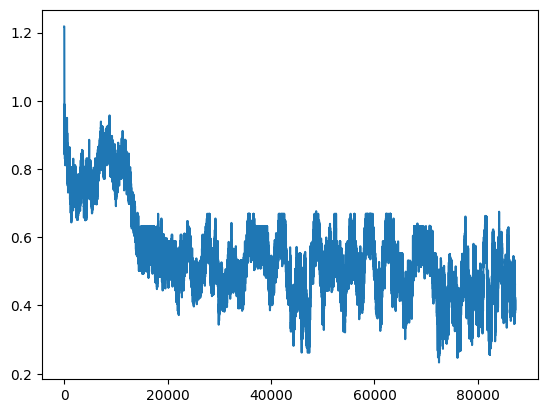

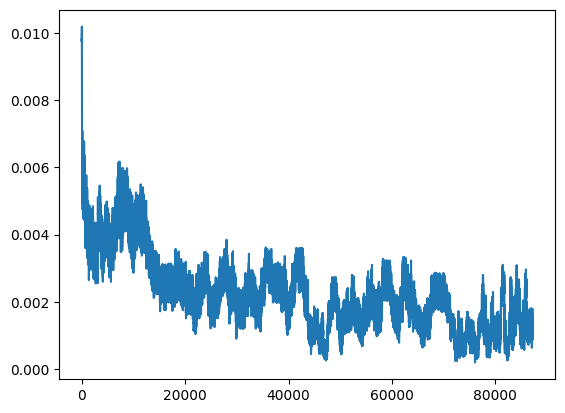

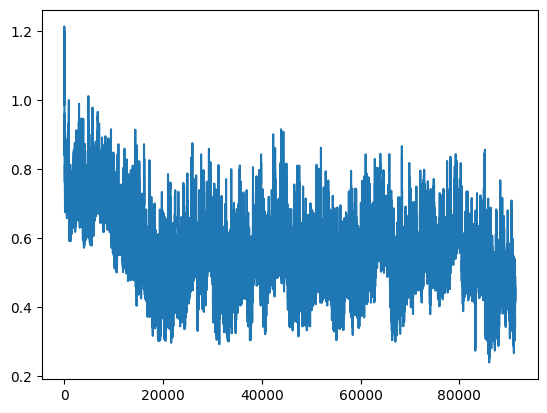

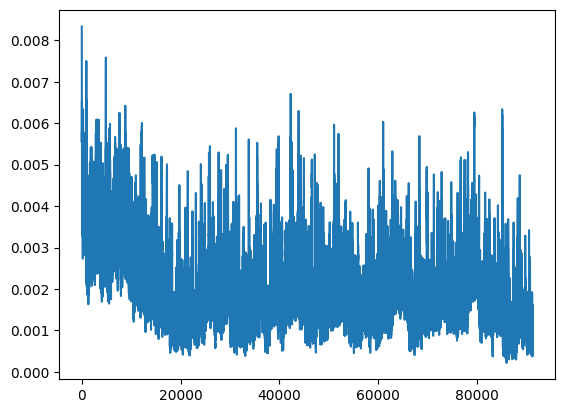

In [ ]:

ddata1 = dist_fixed(Z1, U2,5)
plt.plot(ddata1[0])
plt.show()
plt.plot(ddata1[1])
plt.show()

ddata2 = dist_fixed(Z2, U2, 5)
plt.plot(ddata2[0])
plt.show()
plt.plot(ddata2[1])
plt.show()



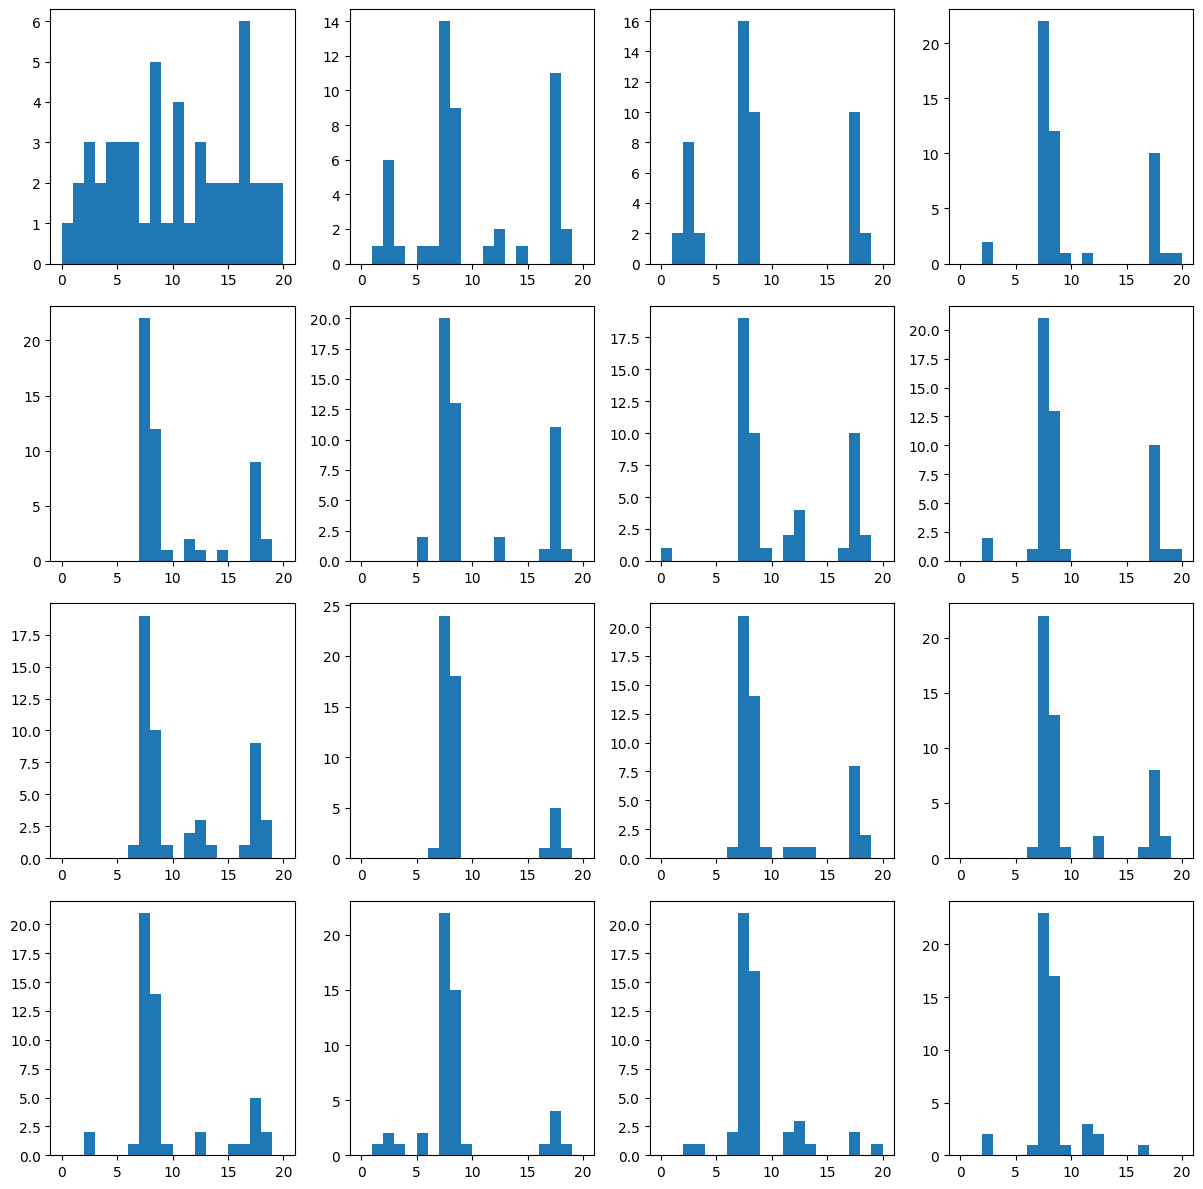

In [ ]:
fdraw_histograms(Z1, 16, n_rows = 4, n_cols =4)


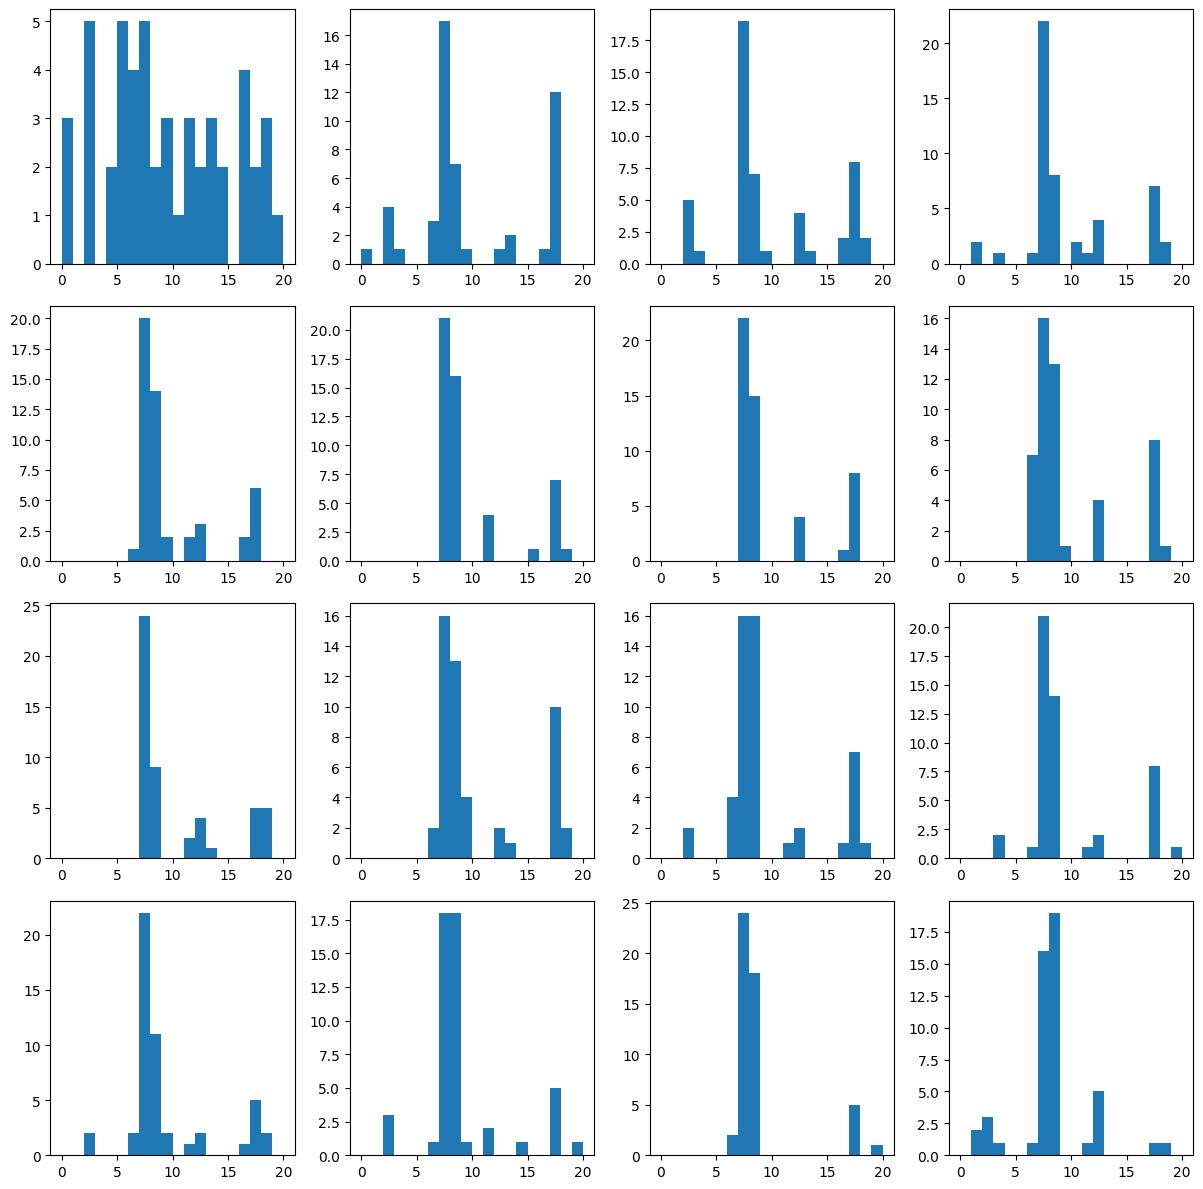

In [ ]:
fdraw_histograms(Z2, 16, n_rows = 4, n_cols =4)


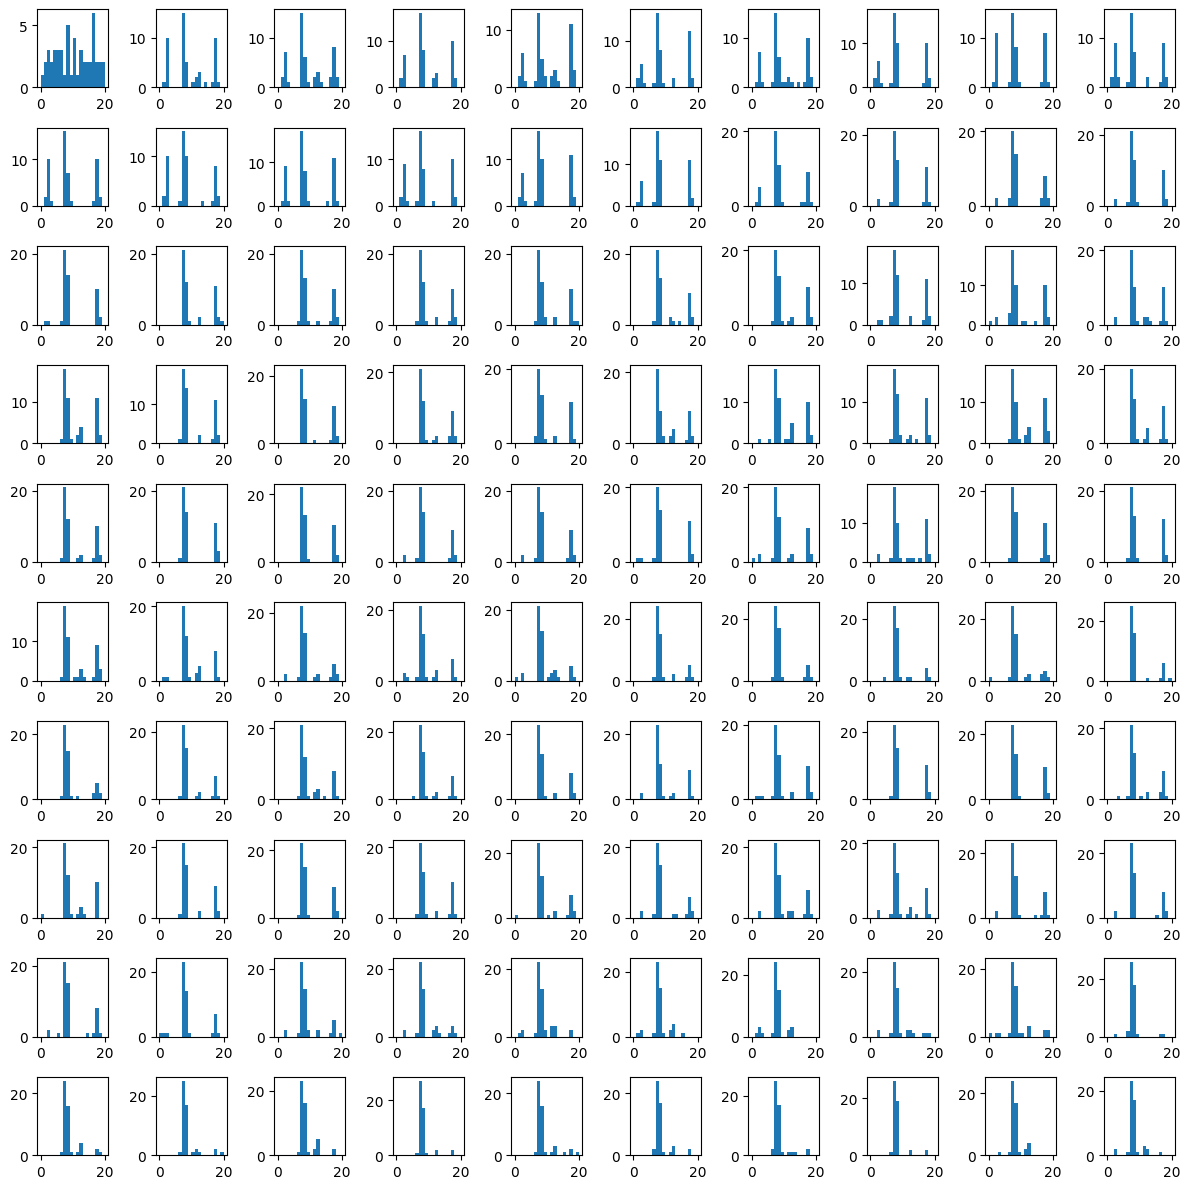

In [ ]:
fdraw_histograms(Z1, 100, n_rows = 10, n_cols =10)


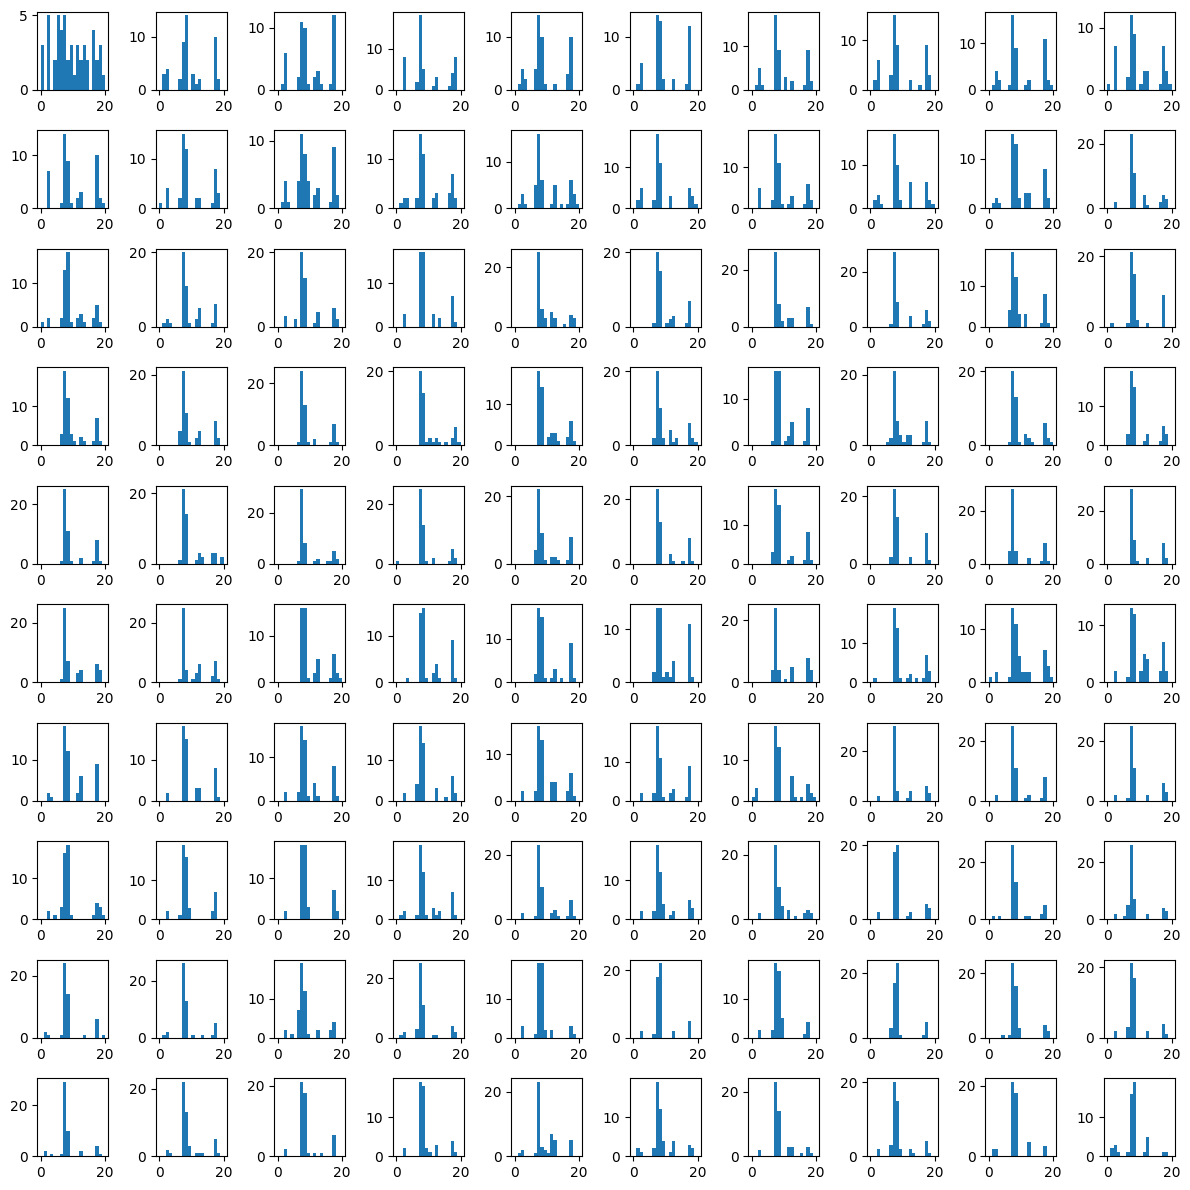

In [ ]:
fdraw_histograms(Z2, 100, n_rows = 10, n_cols =10)


### SIMULATION WITH U3

In [ ]:
Z3 = simulate_inhomo1(num_particles = 50, step = 300000, beta = 100, U = U3, L = 1/10, timeout = 60*5)
Z4 = simulate_inhomo2(num_particles = 50, step = 300000, beta = 100, U = U3, L = 1/10, timeout = 60*5)

In [ ]:
give_inv(100,U3)/S

array([0.00334525, 0.00488408, 0.00886266, 0.14888498, 0.44513544,
       0.2951945 , 0.02208964, 0.00957895, 0.00707179, 0.00597801,
       0.00542586, 0.00516198, 0.00508236, 0.00512732, 0.00523527,
       0.00530673, 0.0051965 , 0.00479774, 0.00416653, 0.0034744 ])

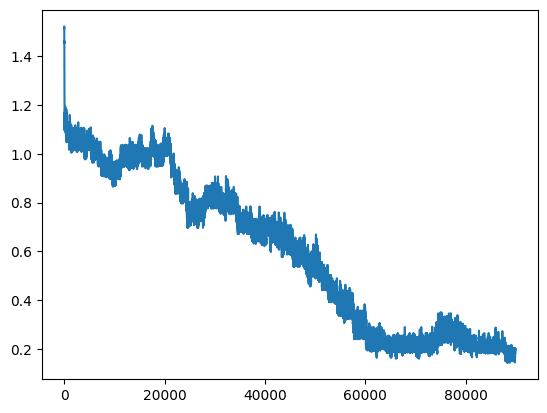

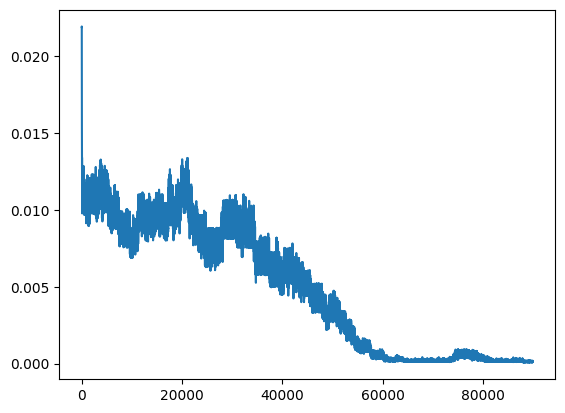

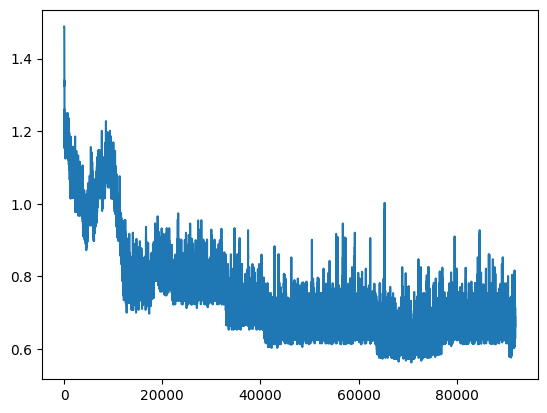

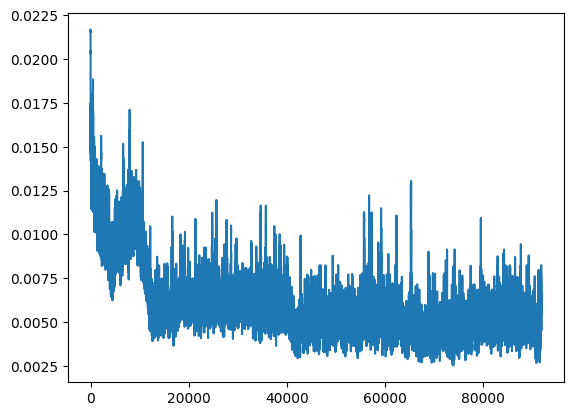

In [ ]:

ddata3 = dist_fixed(Z3, U3, 100)
plt.plot(ddata1[0])
plt.show()
plt.plot(ddata1[1])
plt.show()

ddata4 = dist_fixed(Z4, U3, 100)
plt.plot(ddata2[0])
plt.show()
plt.plot(ddata2[1])
plt.show()


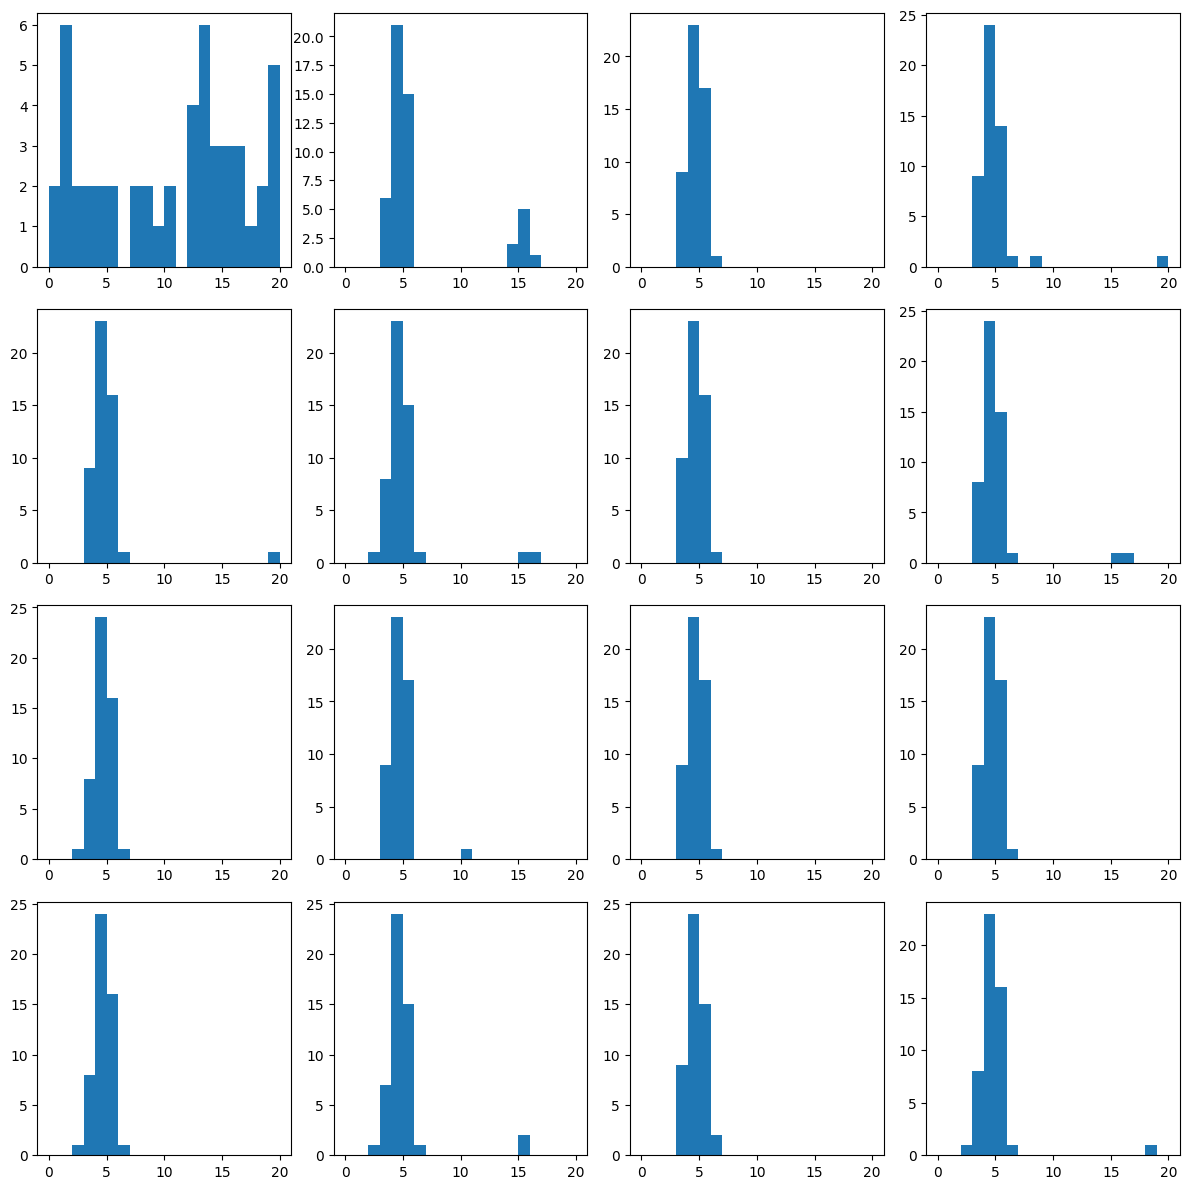

In [ ]:
draw_histograms(Z3, 16, n_rows = 4, n_cols =4)


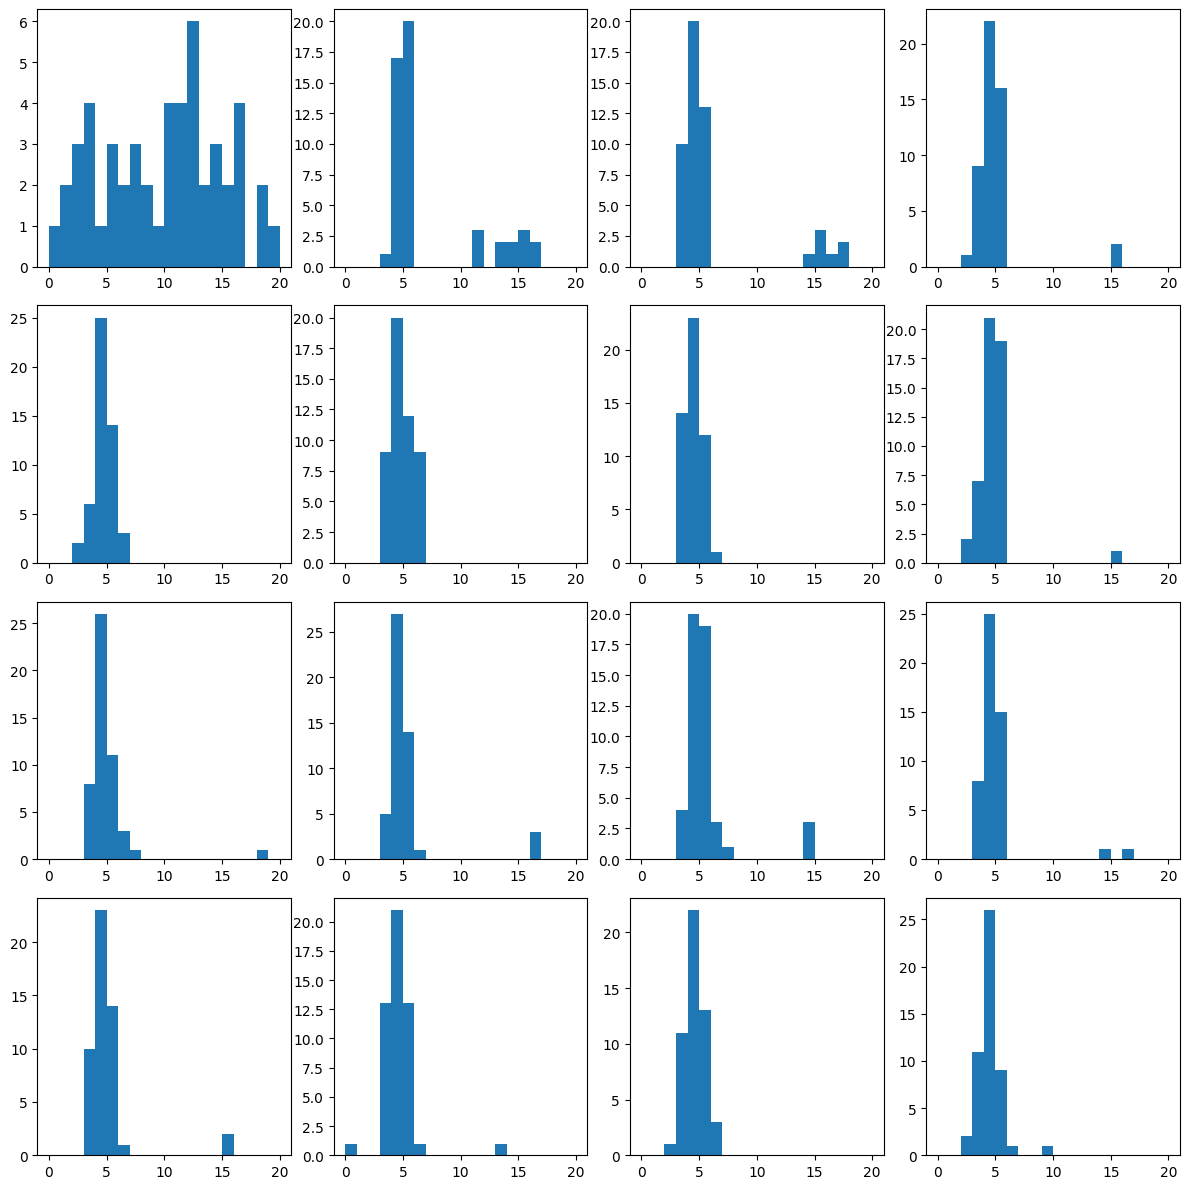

In [ ]:
draw_histograms(Z4, 16, n_rows = 4, n_cols =4)


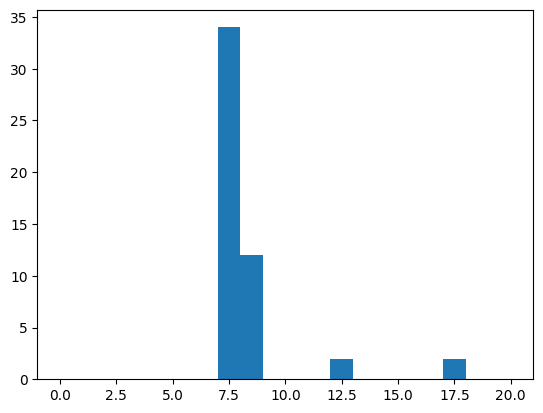

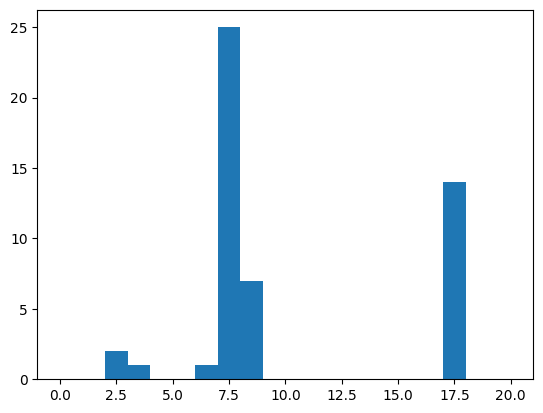

In [ ]:
plt.hist(Z1[0][-1], bins = range(S+1))
plt.show()
plt.hist(Z2[0][-1], bins = range(S+1))
plt.show()

## I.2. Nonlinear and inhomogeneous Markov chains
In this section, we are going to choose

\begin{align}
\beta_t = (t_0+t)^{\alpha} -1, \quad \alpha = \frac{-m_1}{2(1-m_1)}
\end{align}
So if $m_1 =-1$ then $\alpha = 1/4$ and we choose $t_0 \geq 1$.

In [ ]:

### NEW VERSION OF GENERATOR

def solver(tau,e,eta,X, alpha = 1/4, t_0 = 20, U = U1):
  rho = density_transform(eta)
  p_ip1 = theta(rho[X],rho[(X+1)%S])/rho[X] * negative_part((U[(X+1)%S] - U[X]))
  p_im1 = theta(rho[X],rho[(X-1)%S])/rho[X] * negative_part((U[(X-1)%S] - U[X]))
  Lp1       = lambda t: 1 + p_ip1 * ( (t_0 + t)**alpha -1 )
  Lm1       = lambda t: 1 + p_im1 * ( (t_0 + t)**alpha -1 )
  Ldiag     = lambda t: Lp1(t) + Lm1(t)
  int_Ldiag = lambda tau1, t: integral(Ldiag, t+tau1, a = tau1)
  function  = lambda t: int_Ldiag(tau, t) -e  ## CAN WE ADD THE RATE OF THE PREVIOUS GENERATOR HERE?
  try:
    time = brentq(function, 0, 2*e, xtol = 10**(-5))
    return time
  except:
    return np.inf

def jump_dist_inhomo_nonlinear(eta, X, beta, U = U1):       # ETA IS A MEASURE!
    rho = density_transform(eta)
    expression_iplus1  = theta(rho[X],rho[(X+1)%S])/rho[X] * beta * negative_part(U[(X+1)%S] - U[X]) + 1
    expression_iminus1 = theta(rho[X],rho[(X-1)%S])/rho[X] * beta * negative_part(U[(X-1)%S] - U[X]) + 1
    a = expression_iplus1 / (expression_iplus1 + expression_iminus1)
    return np.array([a,1-a])

In [ ]:
def simulate_inhomo_nonlinear(num_particles = 100, initial= ppi, U = U1,
                              step= 5000, alpha = 1/4, t_0 = 1, L = 0.5,
                              timeout = 60*3):
  M = num_particles            # NUMBER OF PARTICLES NEEDED
  list_of_particles = []       # A LIST OF POSITIONS FOR KEEPING TRACK OF THE EVOLUTION
  jump_times        = []       # LIST OF HOLDING TIMES BETWEEN JUMPS
  holding_times     = []
  invariants         = []
  beta_0 = t_0**alpha - 1
  invariants.append(give_inv(beta_0, U)/S)
  tau = 0
  X_0 = np.random.choice(np.arange(S), M, p = initial ) # INITIAL VECTOR WITH LAW initial
  list_of_particles.append(X_0)                         # PUT IN THE FIRST POSITION IN THE LIST
  holding_times.append(tau)
  steptaken = 0
  timelimit = time.time() + timeout
  for i in range(step):
    list_L = []
    E1 = np.random.exponential(1, M)        # INDEPENDENT VECTOR OF M EXPONENTIAL(1) RVS
    for j in range(M):
      list_L.append( solver(tau, E1[j]/L, counting_measure(X_0), X_0[j], alpha, t_0, U) )
    list_L = np.asarray(list_L)             # TURN INTO NUMPY ARRAY FOR EASY DIVIDING
    Xmin  = np.min(list_L)
    if Xmin == np.inf or time.time() > timelimit:                 ## IF THE JUMP TIME EQUALS TO INF, THE CONSTRUCTION STOPS!
      break
    argmin_0 = np.argmin(list_L)          # THE COORDINATE WHERE THE BELL RINGS
    beta_t = (t_0+tau +Xmin)**alpha -1   # new tau = previous tau + Xmin (the holding time)
    invariants.append(give_inv(beta_t, U)/S)
    proba_next = jump_dist_inhomo_nonlinear(counting_measure(X_0), X_0[argmin_0], beta_t, U)
    next = (X_0[argmin_0]+1)%S
    back = (X_0[argmin_0]-1)%S
    nextstate = np.random.choice([next,back], p = proba_next )
    X_0 = np.copy(X_0)                      # CREATE NEW COPY, OTHERWISE X_0 IN THE LIST WOULD AUTOMATICALLY CHANGE!!!!!!
    X_0[argmin_0] = nextstate               # JUMP TO THE (I+1)%S STATE (THE COORDINATE WHERE THE BELL RINGS)
    list_of_particles.append(np.copy(X_0))  # PUT IN THE LIST A COPY OF NEW POSITION
    tau = tau + Xmin
    jump_times.append(tau)
    holding_times.append(Xmin)
    steptaken = steptaken+1
  return list_of_particles, jump_times, holding_times, steptaken, invariants

# MAIN TEST

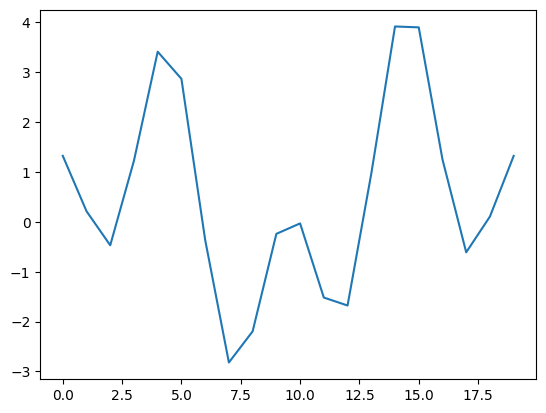

In [ ]:
drawU(U2)

In [ ]:
maintest = simulate_inhomo_nonlinear(num_particles = 50, U = U2/10,  step= 5000000,
                                 alpha = 1/4,  t_0 = 1.1, L = 0.005,
                                 timeout = 60*60*2)

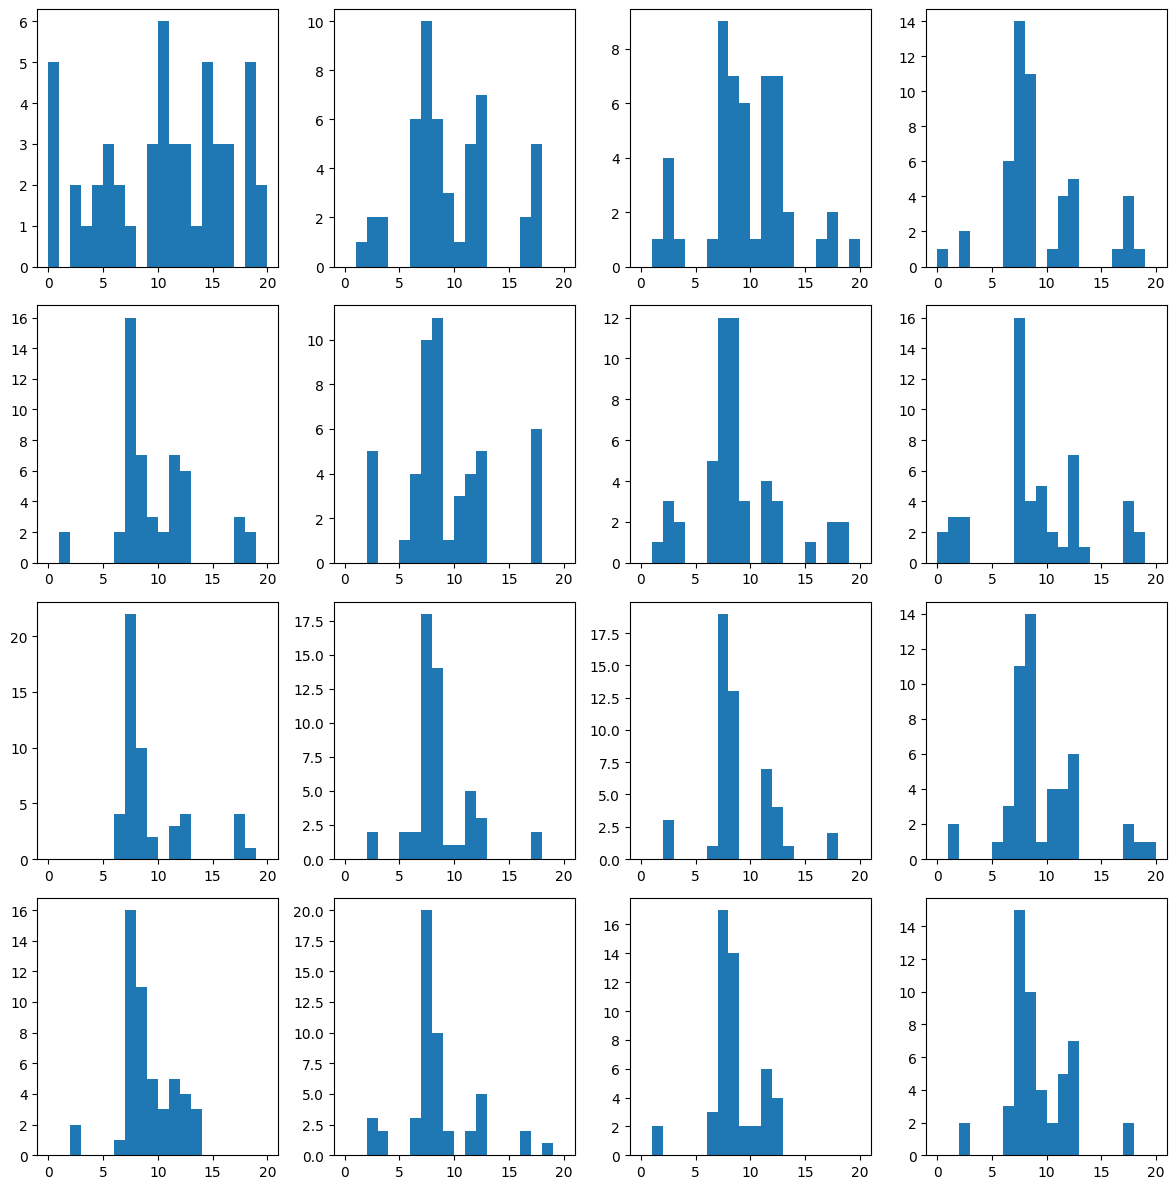

In [ ]:
fdraw_histograms(maintest, 16, n_rows = 4, n_cols =4)


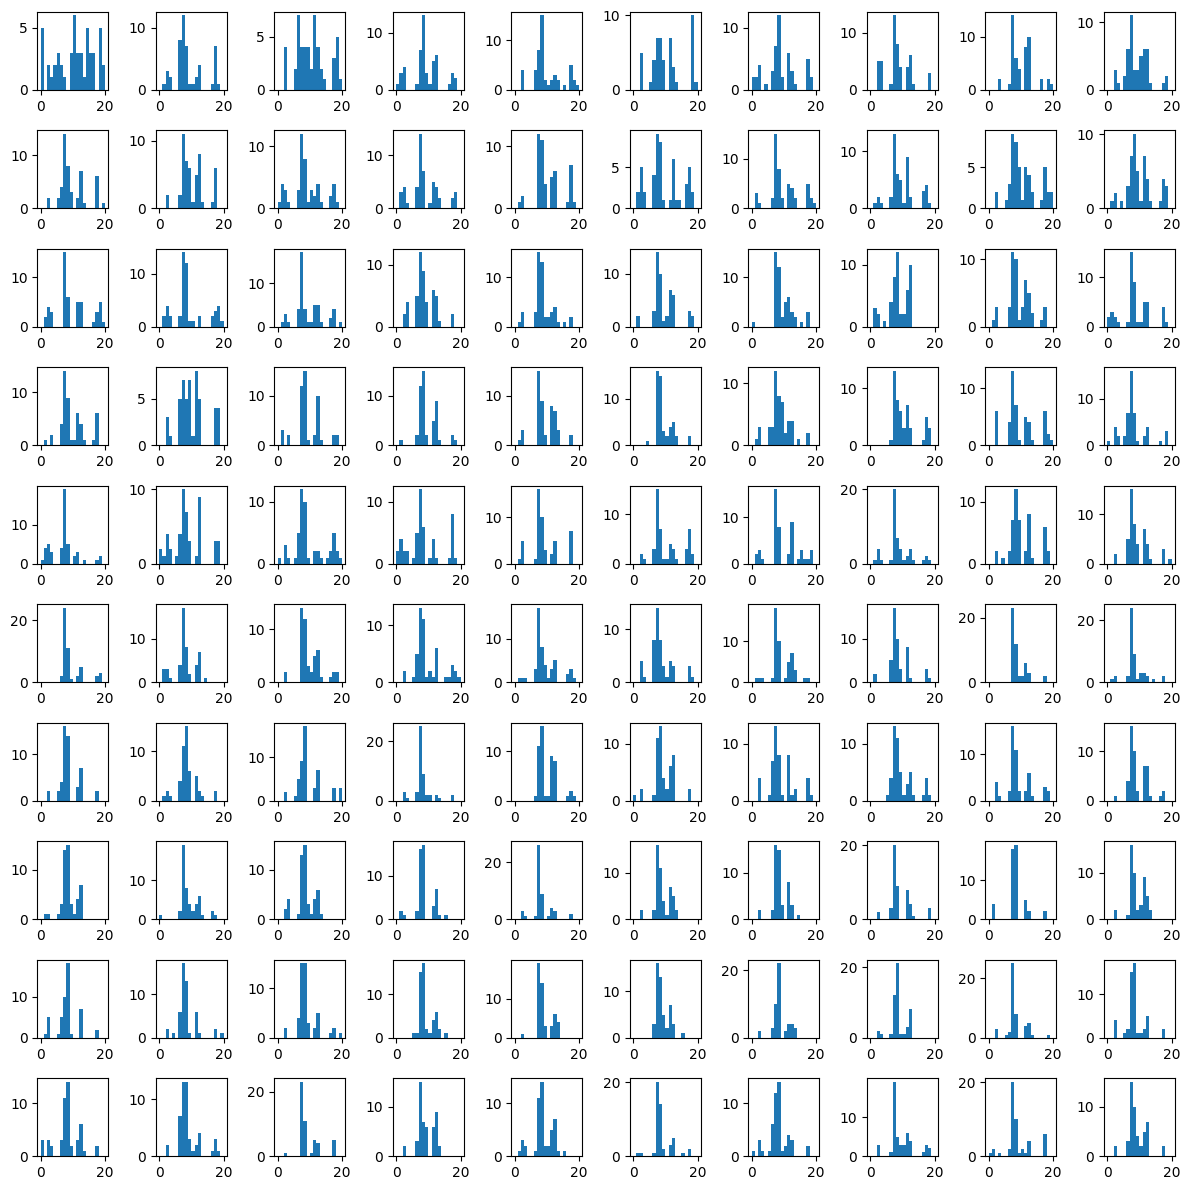

In [ ]:
fdraw_histograms(maintest, 100, n_rows = 10, n_cols = 10)


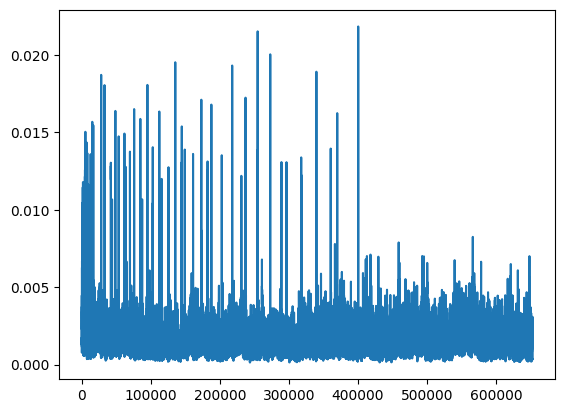

In [ ]:
distance2 = [l2_dist(counting_measure(maintest[0][i]), maintest[4][i]) for i in range(len(maintest[0]))]
plt.plot(distance2)
plt.show()

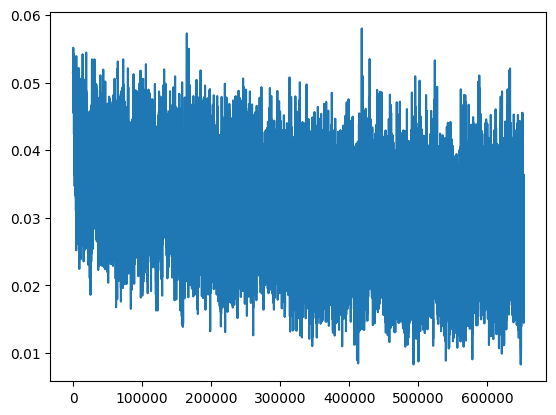

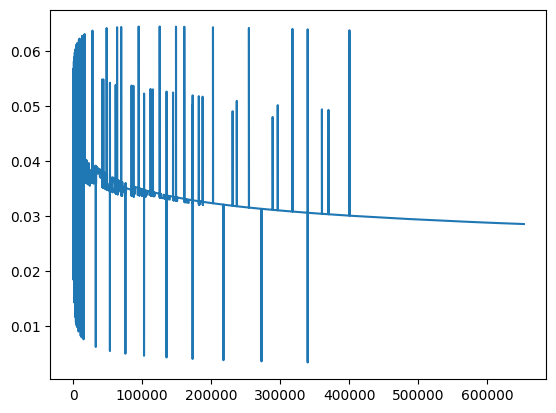

In [ ]:
distancel2dirac_maintest = [l2_dist(counting_measure(maintest[0][i]), give_inv(100000,U2)/S) for i in range(len(maintest[0]))]
plt.plot(distancel2dirac_maintest)
plt.show()

distancel2inv_dirac_maintest = [l2_dist(maintest[4][i], give_inv(100000,U2)/S) for i in range(len(maintest[0]))]
plt.plot(distancel2inv_dirac_maintest)
plt.show()


In [ ]:
### OLD VERSIOIN OF GENERATOR

def solver1(tau,e,eta,X, alpha = 1/4, t_0 = 20, U = U1):
  rho = density_transform(eta)
  p_ip1 = theta(rho[X],rho[(X+1)%S])/rho[X] * (U[(X+1)%S] - U[X])
  p_im1 = theta(rho[X],rho[(X-1)%S])/rho[X] * (U[(X-1)%S] - U[X])
  k_ip1 = rho[(X+1)%S]/rho[X] -1
  k_im1 = rho[(X-1)%S]/rho[X] -1
  Lp1       = lambda t: negative_part( p_ip1 * ((t_0 + t)**alpha -1) + k_ip1 )
  Lm1       = lambda t: negative_part( p_im1 * ((t_0 + t)**alpha -1) + k_im1 )
  Ldiag     = lambda t: Lp1(t) + Lm1(t)
  int_Ldiag = lambda tau1, t: integral(Ldiag, t+tau1, a = tau1)
  function  = lambda t: int_Ldiag(tau, t) -e  ## CAN WE ADD THE RATE OF THE PREVIOUS GENERATOR HERE?
  try:
    time = brentq(function, 0, 2**20, xtol = 10**(-5))
    return time
  except:
    return np.inf

def jump_dist_inhomo_nonlinear1(eta, X, beta, U = U1):       # ETA IS A MEASURE!
    rho = density_transform(eta)
    expression_iplus1  = theta(rho[X],rho[(X+1)%S])/rho[X]*beta*(U[(X+1)%S] - U[X]) + rho[(X+1)%S]/rho[X]-1
    expression_iminus1 = theta(rho[X],rho[(X-1)%S])/rho[X]*beta*(U[(X-1)%S] - U[X]) + rho[(X-1)%S]/rho[X]-1
    a = negative_part(expression_iplus1) / (negative_part(expression_iplus1) + negative_part(expression_iminus1))
    return np.array([a,1-a])

In [ ]:
def simulate_inhomo_nonlinear1(num_particles = 100, initial= ppi, U = U1,
                              step= 5000, alpha = 1/4, t_0 = 1, L = 0.5,
                              timeout = 60*3):
  M = num_particles            # NUMBER OF PARTICLES NEEDED
  list_of_particles = []       # A LIST OF POSITIONS FOR KEEPING TRACK OF THE EVOLUTION
  jump_times        = []       # LIST OF HOLDING TIMES BETWEEN JUMPS
  holding_times     = []
  invariants         = []
  beta_0 = t_0**alpha - 1
  invariants.append(give_inv(beta_0, U)/S)
  tau = 0
  X_0 = np.random.choice(np.arange(S), M, p = initial ) # INITIAL VECTOR WITH LAW initial
  list_of_particles.append(X_0)                         # PUT IN THE FIRST POSITION IN THE LIST
  holding_times.append(tau)
  steptaken = 0
  timelimit = time.time() + timeout
  for i in range(step):
    list_L = []
    E1 = np.random.exponential(1, M)        # INDEPENDENT VECTOR OF M EXPONENTIAL(1) RVS
    for j in range(M):
      list_L.append( solver1(tau, E1[j]/L, counting_measure(X_0), X_0[j], alpha, t_0, U) )
    list_L = np.asarray(list_L)             # TURN INTO NUMPY ARRAY FOR EASY DIVIDING
    Xmin  = np.min(list_L)
    if Xmin == np.inf or time.time() > timelimit:                 ## IF THE JUMP TIME EQUALS TO INF, THE CONSTRUCTION STOPS!
      break
    argmin_0 = np.argmin(list_L)          # THE COORDINATE WHERE THE BELL RINGS
    beta_t = (t_0+tau +Xmin)**alpha -1   # new tau = previous tau + Xmin (the holding time)
    invariants.append(give_inv(beta_t, U)/S)
    proba_next = jump_dist_inhomo_nonlinear1(counting_measure(X_0), X_0[argmin_0], beta_t, U)
    next = (X_0[argmin_0]+1)%S
    back = (X_0[argmin_0]-1)%S
    nextstate = np.random.choice([next,back], p = proba_next )
    X_0 = np.copy(X_0)                      # CREATE NEW COPY, OTHERWISE X_0 IN THE LIST WOULD AUTOMATICALLY CHANGE!!!!!!
    X_0[argmin_0] = nextstate               # JUMP TO THE (I+1)%S STATE (THE COORDINATE WHERE THE BELL RINGS)
    list_of_particles.append(np.copy(X_0))  # PUT IN THE LIST A COPY OF NEW POSITION
    tau = tau + Xmin
    jump_times.append(tau)
    holding_times.append(Xmin)
    steptaken = steptaken+1
  return list_of_particles, jump_times, holding_times, steptaken, invariants

In [ ]:
secondtest = simulate_inhomo_nonlinear1(num_particles = 50, U = U2/10,  step= 5000000,
                                 alpha = 1/4,  t_0 = 1.1, L = 0.005,
                                 timeout = 60*60*2)

<ipython-input-8-f9cd663ffb41>:63: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return quad(f, a, t)[0]


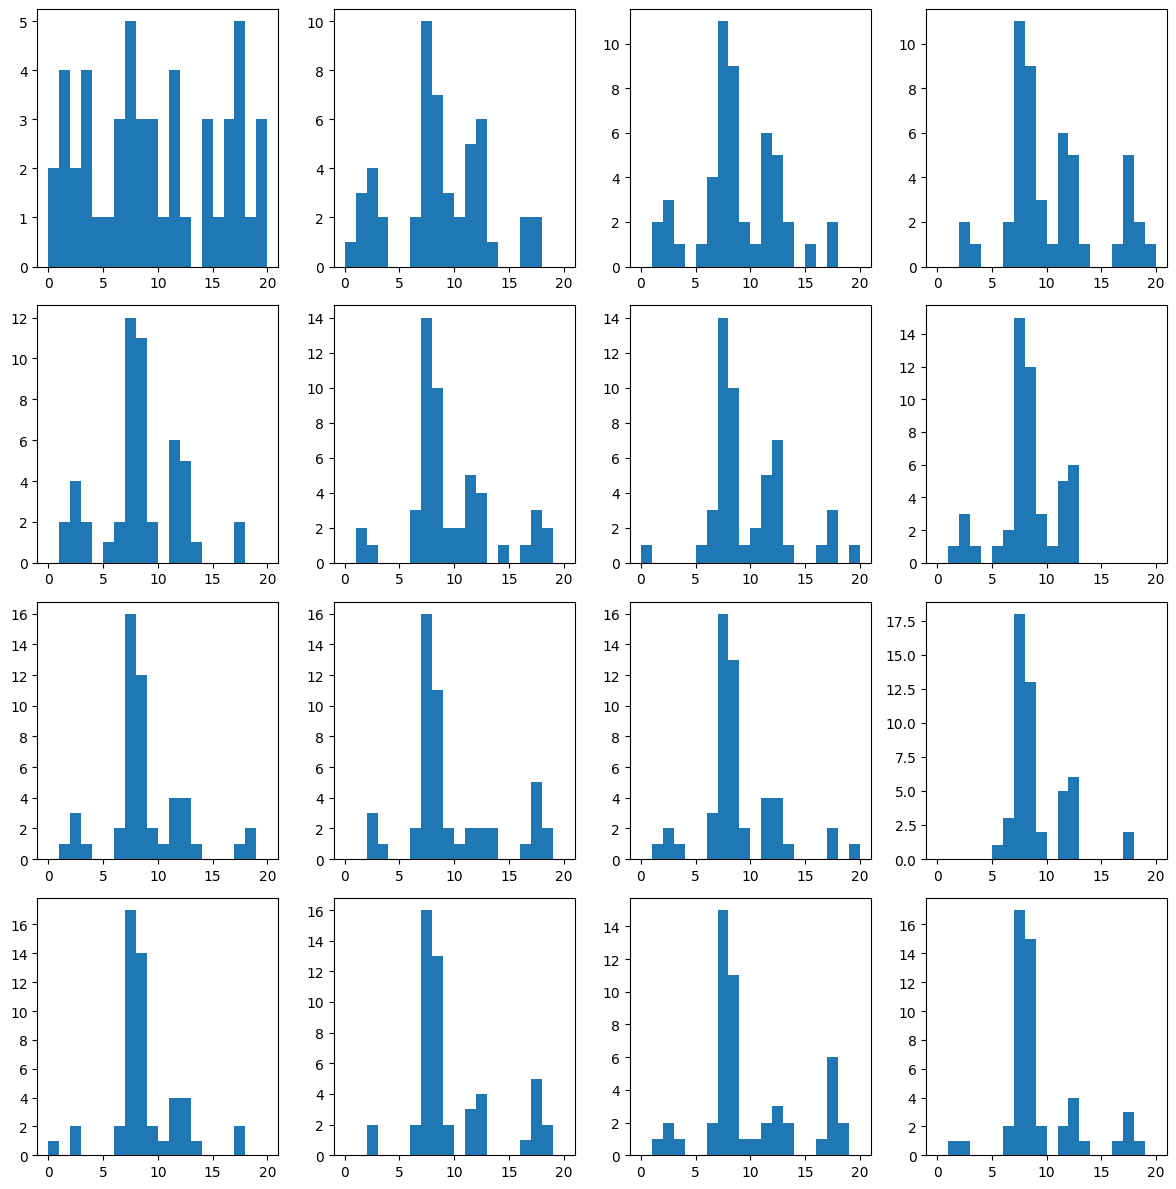

In [ ]:
draw_histograms(secondtest, 16, n_rows = 4, n_cols =4)


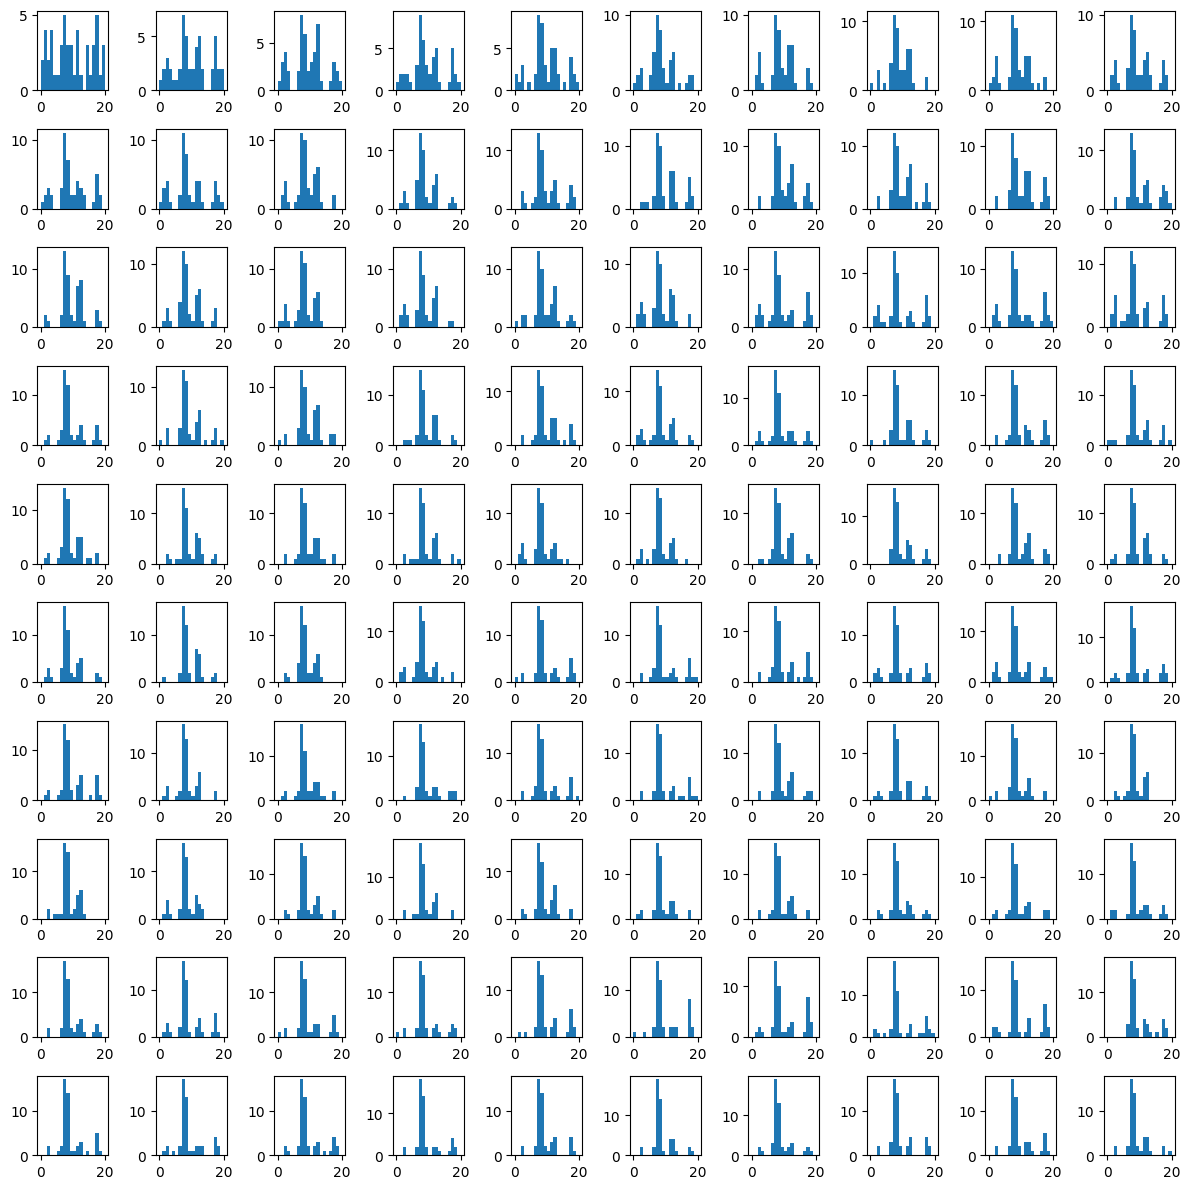

In [ ]:
draw_histograms(secondtest, 100, n_rows = 10, n_cols =10)


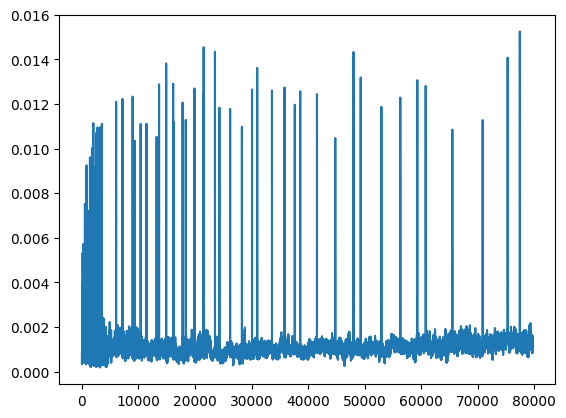

In [ ]:
distancel2 = [l2_dist(counting_measure(secondtest[0][i]), secondtest[4][i]) for i in range(len(secondtest[0]))]
plt.plot(distancel2)
plt.show()

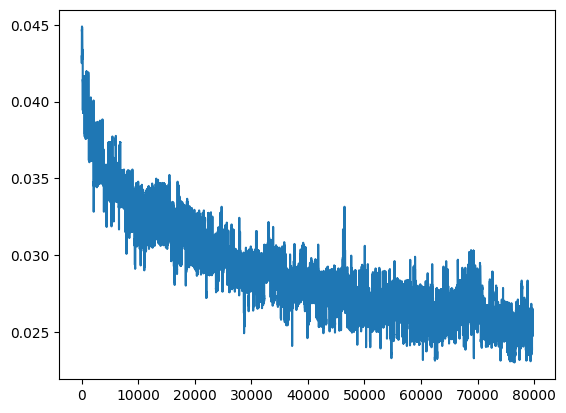

In [ ]:
distancel2dirac_secondtest = [l2_dist(counting_measure(secondtest[0][i]), give_inv(100000,U2/10)/S) for i in range(len(secondtest[0]))]
plt.plot(distancel2dirac_secondtest)
plt.show()

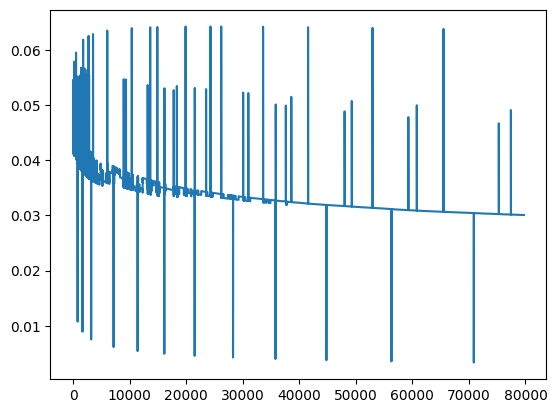

In [ ]:
distanceinv_dirac_secondtest = [l2_dist(secondtest[4][i], give_inv(100000,U2/10)/S) for i in range(len(secondtest[0]))]
plt.plot(distanceinv_dirac_secondtest)
plt.show()

In [ ]:
give_inv(100000,U2/10)

array([3.47410418e-03, 4.06081971e-03, 4.61416268e-03, 3.51523735e-03,
       2.83277135e-03, 2.96531926e-03, 4.51124445e-03, 1.99186390e+01,
       8.96457851e-03, 4.40419279e-03, 4.23538260e-03, 6.20059019e-03,
       6.62195230e-03, 3.63488551e-03, 2.72433328e-03, 2.72791950e-03,
       3.50486330e-03, 4.75933553e-03, 4.13422683e-03, 3.47506813e-03])